## Housing classification with Decision Trees - CH.SC.U4CSE23240

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn

In [2]:
data = pd.read_csv("house.csv")
print(data.shape)
data.head()

(109, 3)


,age,income,buy_house
0,34,1250000,1
1,28,850000,0
2,45,2000000,1
3,22,300000,0
4,39,1800000,1


In [3]:
data.isnull().sum()

,0
age,0
income,0
buy_house,0


In [4]:
x = data[['age','income']]
y = data['buy_house']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(87, 2)

(87,)

(22, 2)

(22,)

In [5]:
model = DecisionTreeClassifier(criterion='entropy',random_state=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('y_pred : ', y_pred)

y_pred :  [0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1]


In [6]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('conf_mat : ', conf_mat)
Acc = metrics.accuracy_score(y_test, y_pred)
print('Acc : ', Acc)
print("Acc in percentage : ", int(Acc*100),'%')

conf_mat :  [[ 9  0]
 [ 0 13]]
Acc :  1.0
Acc in percentage :  100 %


<Axes: xlabel='Predicted', ylabel='Actual'>

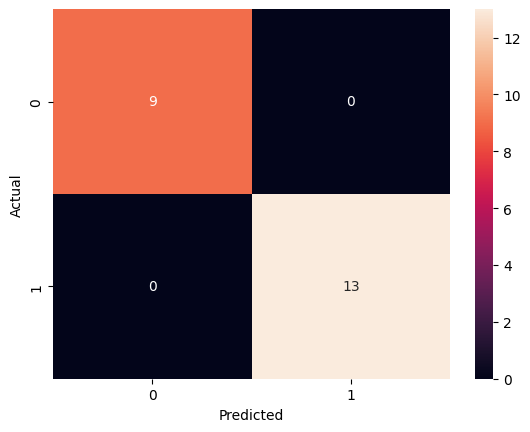

In [7]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)